In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler


In [143]:
df = pd.read_csv('./data/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print(df.head())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# errors='coerce' is a good approach to handle non-numeric values by replacing them with NaN.

# drop customerID column because this will not help in prediction and cause trouble in one hot encoding
df.drop('customerID', axis=1, inplace=True)


In [144]:
def fill_missing_values(df, option : str='mean'):
    """Fill missing values in data frame in place"""
    
    missing_values = df.isna().sum()
    # print(missing_values)

    # Check if there are any missing values
    if missing_values.any():
        print("There are missing values in the dataset.")
        # Display the count of missing values for each column
        # find the columns with missing values
        columns_with_missing_values = df.columns[missing_values > 0]
        print("Missing values per column:")
        print(missing_values[columns_with_missing_values])

        # fix the missing values
        # we can use df.replace(to_replace=' ', value=-1) to replace all missing values with -1
        for column in columns_with_missing_values:
       
            if option == 'drop':
                df.dropna()
            elif option == 'mean':
                df[column].fillna(df[column].mean(), inplace=True)
            elif option == 'median':
                df[column].fillna(df[column].median(), inplace=True)
            elif option == 'mode':
                df[column].fillna(df[column].mode()[0], inplace=True)
            elif option == 'linear':
                df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
            elif option == 'quadratic':
                df[column].interpolate(method='quadratic', limit_direction='forward', inplace=True)
            elif option == 'cubic':
                df[column].interpolate(method='cubic', limit_direction='forward', inplace=True)
            elif option == 'spline':
                df[column].interpolate(method='spline', order=3, limit_direction='forward', inplace=True)
        
        print("Missing values per column are fixed\n")

    else:
        print("There are no missing values in the dataset.\n")
       


In [145]:
def normalize_numeric_data(df, numeric_cols):
    """Normalize numeric columns in dataframe in place"""

    # print(numeric_cols)
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



In [146]:
def one_hot_encode(df, categorical_cols):
    """One hot encode categorical columns in dataframe in place"""
    pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # setting `drop_first=True`, the first category in each original column is dropped,
    # and its presence is implied by a 0 in all the other categories.



def label_encode(df):
    """Label encode categorical columns in dataframe in place"""
    categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
    print(categorical_cols)
    label_encoders = {}
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

In [147]:

learn_df = df.copy()
fill_missing_values(learn_df, option='mean')

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns with binary data
numeric_cols = [col for col in numeric_cols if len(df[col].unique()) > 2]
# print(numeric_cols)

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
# add the binary column back to the list of categorical columns
binary_cols =  [col for col in numeric_cols if len(df[col].unique()) == 2]
categorical_cols.extend(binary_cols)
print(categorical_cols)

normalize_numeric_data(learn_df, numeric_cols)
one_hot_encode(learn_df, categorical_cols)
label_encode(learn_df)

There are missing values in the dataset.
Missing values per column:
TotalCharges    11
dtype: int64
Missing values per column are fixed

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [148]:
learn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,1,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,1,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,1,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,1,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [149]:
learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [ ]:
def LogisticRegression():
    pass


In [62]:
def get_top_score_feature_df(df, label_col, k=15):
    """Get the top k features with the highest score
        Return a new dataframe with the top k features
    """

    X = df.drop(columns=[label_col])
    y = df[label_col]
    selector = SelectKBest(mutual_info_classif, k=k)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)
        
    # Get the scores
    selector.fit(X, y)
    scores = selector.scores_

    df_scores = pd.DataFrame(scores, columns=["Score"], index=X_train.columns)
    df_scores = df_scores.sort_values(by="Score", ascending=False)

    # keep the top k features of the df DataFrame
    top_score_feature_df = df[df_scores.index[:k]]


    # Plot the scores
    plt.figure(figsize=(10, 10))
    plt.barh(df_scores.index, df_scores["Score"])
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()
    
    return top_score_feature_df

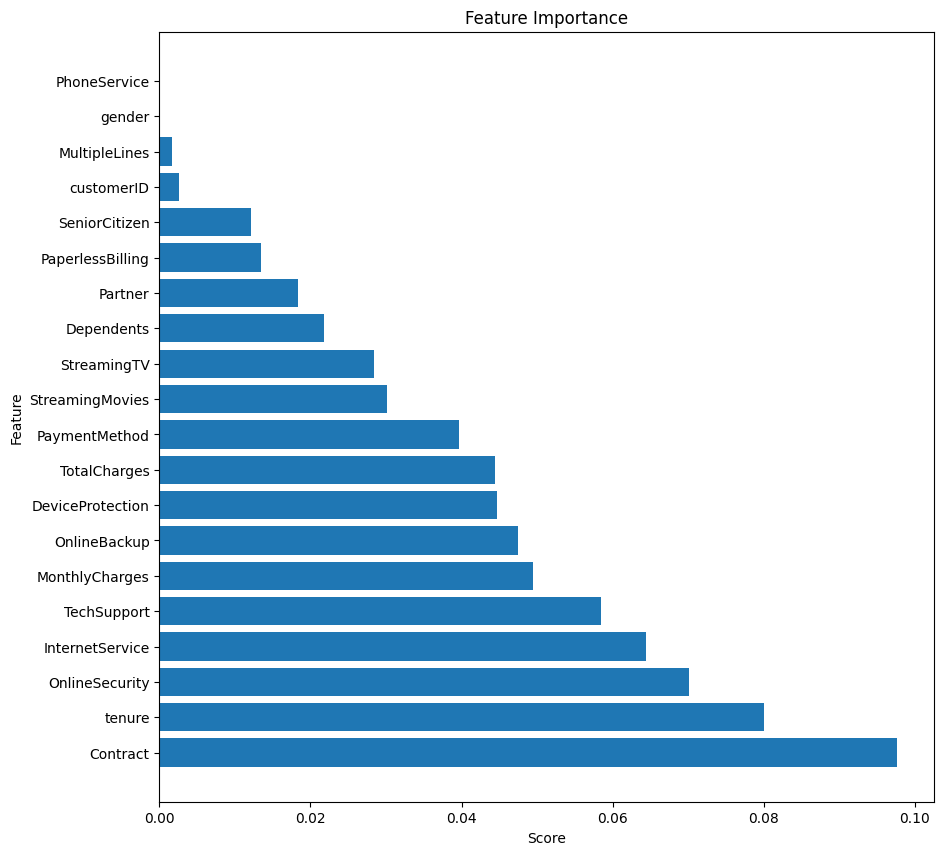

In [63]:
top_score_feature_df = get_top_score_feature_df(learn_df, 'Churn', k=10)

In [64]:
top_score_feature_df.head()

,Contract,tenure,OnlineSecurity,InternetService,TechSupport,MonthlyCharges,OnlineBackup,DeviceProtection,TotalCharges,PaymentMethod
0,0,-1.277445,0,0,0,-1.160323,2,0,-0.994971,2
1,1,0.066327,2,0,0,-0.259629,0,2,-0.173876,3
2,0,-1.236724,2,0,0,-0.362660,2,0,-0.960399,3
3,1,0.514251,2,0,2,-0.746535,0,2,-0.195400,0
4,0,-1.236724,0,1,0,0.197365,0,0,-0.941193,2
